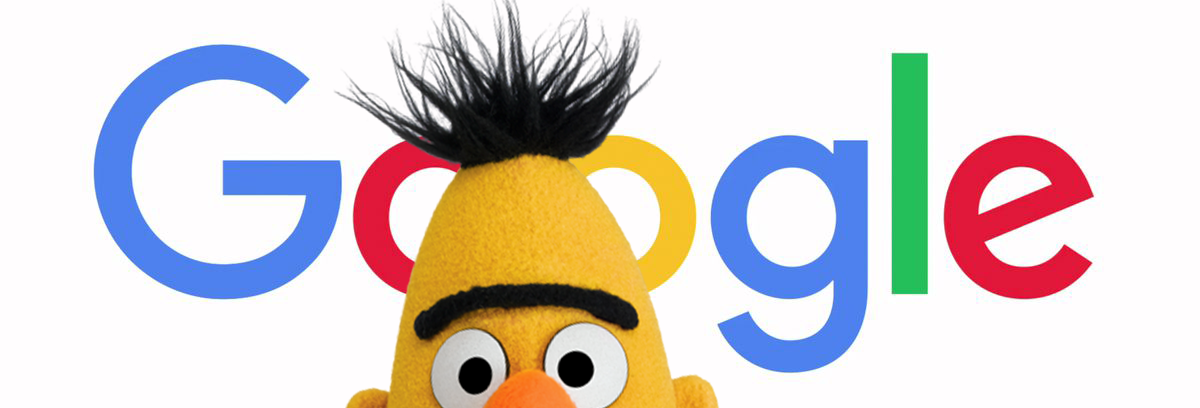

<center>
    
    
## Exploring & Implementing BETO Q/A Chatbox - A NLP test project
___


<center>

##### Pablo de la Asunción Cumbrera Conde


### Índice
 - Introducción y objetivos
 - Modelo y test
 - Set Up
 - Implementación en aplicación
 - Conclusiones

#### Introducción
___

#### ¿Qué es un chatbox?
Un chatbot, también conocido como un asistente digital,es un programa o herramienta la cual sirve como un simulador de conversaciones humanas.

Los «chatbots» analizan y procesan las solicitudes de cada usuario, para automáticamente ellos mismos proporcionat respuestas oportunas y pertinentes.

#### ¿Cuál es el objetivo de este proyecto?

El objetivo es la implementación de una IA questioning/answering al que pueda entrenársele de forma sencilla en una temática (que pueda variar acorde a las necesidades del usuario), y que sea capaz de responder preguntas sencillas, seleccionar un enunciado correcto entre varios falsos o encontrar si un enunciado es verdadero o falso.

También encontraremos la posibilidad de implementarlo en un entorno conocido y sencillo.

#### ¿Qué herramienta vamos a utilizar para ello?
Para dar solución al objetivo planteado implementaremos el modelo BERT (BETO es español) -Bidirectional Encoder Representations from Transformers- o Representación de Codificador Bidireccional de Transformadores es una técnica basada en redes neuronales para el pre-entrenamiento de NLP desarrollada por Google en 2018 (Jacob Devlin and cols.) Google está aprovechando BERT para comprender mejor las búsquedas de los usuarios.

El modelo BERT original se creó usando dos corpus de lengua inglesa: BookCorpus y Wikipedia en inglés.

#### Modelo y testeo
____

In [1]:
#Importamos el modelo

from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
  
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es")

model = AutoModelForQuestionAnswering.from_pretrained("mrm8488/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es")

In [2]:
#Exploramos las diferentes capas del modelo
#print(model)

In [3]:
# Prueba

contexto = 'Hace mucho calor en Sevilla'
pregunta = '¿Cuánto calor hace en Sevilla?'

encode= tokenizer.encode_plus(pregunta, contexto, return_tensors='pt')
input_ids = encode ['input_ids'].tolist()
tokens= tokenizer.convert_ids_to_tokens(input_ids[0])
for id, token in zip(input_ids[0], tokens):
    print('{:<12} {:>6}'.format(token,id))

[CLS]             4
¿              1067
cuanto         3288
calor          7110
hace           1796
en             1036
se             1062
##villa        8724
?              1064
[SEP]             5
hace           1796
mucho          1789
calor          7110
en             1036
se             1062
##villa        8724
[SEP]             5


In [4]:
nlp = pipeline('question-answering', model = model, tokenizer = tokenizer)
output = nlp({'question':pregunta,'context':contexto})
print(output)

{'score': 0.4731372594833374, 'start': 5, 'end': 16, 'answer': 'mucho calor'}


#### Set Up
___

In [5]:
from textwrap import wrap

#Función Q/A

def pregunta_respuesta (model, context, nlp):
    # Loop pregunta-respuestas
    continuar=True
    while continuar:
        print('\nPregunta: ')
        print('---------------------------')
        pregunta= str(input())
        
        continuar = pregunta !=''
        
        if continuar:
            output =  nlp({'question':pregunta,'context':contexto})
            print('\nRespuesta: ')
            print('---------------------------')
            print(output['answer'])
            

In [6]:
# INTRODUCE AQUÍ CONTEXTO EN FORMATO TEXTO O TXT

contexto = "Los textos comienzan a hablar desde el origen de todo, cuando tan solo existía Dios y el resto de figuras celestiales; por lo tanto no había nada en lo que llamamos la Tierra, es decir, en nuestro planeta. Viendo que todo estaba vacío Dios decidió crear la Tierra y el Cielo, siendo los dos lugares que habitaron los seres que iban a comenzar a crear en poco tiempo. La tierra era un caos y el cielo se encontraba en la oscuridad más absoluta, existiendo unas terribles tinieblas, pero entonces Dios dijo que se hiciera la luz y esta se hizo y todo era más brillante y bonito.El espíritu de Dios que habitaba la tierra dijo que la luz era buena y pura y que podía vencer a la oscuridad, así que esta luz hizo desaparecer las tinieblas que abarcaban todo el mundo. Pero Dios entendió que las tinieblas formaban parte del mundo que había creado, así que hizo que estas ocuparan el cielo por la noche, mientras que su luz protegería el mundo durante el día.El segundo día, Dios fue hacia las aguas, aquellas que formaban gran parte de su creación y decidió separarla del resto de su creación, manteniendo el cielo por encima, por debajo la tierra y por debajo de ambas el agua. Esta división en tres capas se suele ver en culturas clásicas, como la babilónica o la egipcia. En algunos textos se habla de que este día también tuvo lugar la creación del infierno pero en el Génesis no se hace mención a ello.En el tercer día, Dios siguió cambiando los tres niveles ya creados, separando los mares para que entre ellos apareciera la tierra. Podríamos decir que en este momento es cuando creó los mares, los océanos y un supercontinente terrestre que los años se dividiría hasta convertirse en lo que conocemos actualmente como nuestros continentes. A continuación Dios hizo que la tierra creará los árboles y la vegetación, poblando el planeta de sus primeros seres vivos, las plantas.El cuarto día tuvo lugar la formación de los cuerpos celestes, los cuales sirvieron para marcar el cambio entre estaciones y los que afectan al cambio entre la noche y el día. En el Génesis se habla de una especie de señorío de estos cuerpos celestes frente a nuestro planeta.El quinto día vio que los primeros seres vivos, las plantas, eran demasiado inmóviles y decidió que debía crear nuevos seres vivos que poblaran su creación. Dios creó a los seres que viven en las aguas y en el cielos, originando con ello grandes monstruos marinos y a numerosas clases de aves.El sexto día Dios comenzó a crear todas las especies animales terrestres, creando un sinfín de animales para poblar el mundo. Pero Dios necesitaba una especie más inteligente, que pudiera razonar, y entonces llevó a cabo la creación de los seres humanos. En otras lecciones ya hemos hablado de cómo el Génesis narra la creación del hombre, pero para resumirlo brevemente Dios creó al hombre para que se multiplicará por toda la tierra y para que dominara sobre el resto de seres vivos.Para concluir el Génesis habla sobre el séptimo día, siendo el momento en el que terminó la creación divina de Dios. Se dice que este fue el día en el que Dios vio toda su obra y descanso, viendo terminado su trabajo, y santificando el séptimo día como el momento del fin de la creación."

In [7]:
pregunta_respuesta (model,contexto,nlp)


Pregunta: 
---------------------------


 ¿Quien creo el cielo y la tierra?



Respuesta: 
---------------------------
Dios

Pregunta: 
---------------------------


In [8]:
#INTRODUCE AQUI TXT

path_txt = r"C:\Users\pablo\OneDrive\Documentos\NLPTEXT-LOTRtest.txt"


f = open(path_txt,'r')
mensaje = f.read()
print(mensaje)
contexto = mensaje
#f.close()

En la Segunda Edad de la Tierra Media, los seÃ±ores de los Elfos, los Enanos y los Hombres recibidos anillos de poder. Sin saberlo, el SeÃ±or Oscuro Sauron forja el anillo Ãšnico en el Monte del Destino, infundiendo en Ã©l una gran parte de su poder para dominar, a travÃ©s de Ã©l y a distancia, los otros Anillos, para que pueda conquistar la Tierra Media. Una alianza final de hombres y elfos lucha contra las fuerzas de Sauron en Mordor, donde el prÃ­ncipe Isildur de Gondor corta el dedo de Sauron, y el Anillo con Ã©l, destruyendo asÃ­ su forma fÃ­sica.

Con la primera derrota de Sauron, comienza la Tercera Edad de la Tierra Media. Desafortunadamente, la influencia del Anillo corrompe a Isildur, y, en lugar de destruir el Anillo, Isildur lo toma para sÃ­ mismo. Isildur es luego asesinado por los Orcos, y el Anillo se pierde por 2500 aÃ±os, hasta que es encontrado por Gollum, quien lo posee por cinco siglos. El anillo es encontrado por un hobbit llamado Bilbo Bolson.

Sesenta aÃ±os mÃ¡s 

In [10]:
pregunta_respuesta (model,contexto,nlp)


Pregunta: 
---------------------------


 ¿Para que viaja Gandalf a Isengard?



Respuesta: 
---------------------------
reunirse con su hechicero Saruman el Blanco

Pregunta: 
---------------------------


 ¿Como se sentia Galdalf cruzando las minas de Moria?



Respuesta: 
---------------------------
gran disgusto de Gandalf

Pregunta: 
---------------------------


 ¿Por que sufre Bilbo?



Respuesta: 
---------------------------
la responsabilidad que ha asumido Frodo por sus acciones

Pregunta: 
---------------------------


In [11]:
#pregunta_respuesta (model,context,nlp)

#### Implementación en Aplicación
___

- A continuación desarrollaremos unas funciones que sean capaces de hacer accesible nuestro modelo desde un APP, tomando aquí como objetivo concreto el 'Facebook Messenger'.

- Dos variables de importancia:

1. The VERIFY_TOKEN: It can be any string, it is used as a kind of password to let facebook know that this server wants to receive messages. It is a good idea to use a long random string. Ex: aa27660aa7e186902981

2. The PAGE_ACCESS_TOKEN: go the settings for Messenger, scroll down to Token Generation and click on the link to create a new page for your app. Once you have created a page, go back to the Token Generation settings and select this page from the drop-down menu. Copy the Page Access Token.


In [12]:
#Under server.py

from flask import Flask, request

app = Flask(__name__)

FB_API_URL = 'https://graph.facebook.com/v2.6/me/messages'

VERIFY_TOKEN = ''# <paste your verify token here>
PAGE_ACCESS_TOKEN = ''# paste your page access token here>"


def get_bot_response(message):
    """This is just a dummy function, returning a variation of what
    the user said. Replace this function with one connected to chatbot."""
    return "This is a dummy response to '{}'".format(message)


def verify_webhook(req):
    if req.args.get("hub.verify_token") == VERIFY_TOKEN:
        return req.args.get("hub.challenge")
    else:
        return "incorrect"

def respond(sender, message):
    """Formulate a response to the user and
    pass it on to a function that sends it."""
    response = get_bot_response(message)
    send_message(sender, response)


def is_user_message(message):
    """Check if the message is a message from the user"""
    return (message.get('message') and
            message['message'].get('text') and
            not message['message'].get("is_echo"))


@app.route("/webhook")
def listen():
    """This is the main function flask uses to 
    listen at the `/webhook` endpoint"""
    if request.method == 'GET':
        return verify_webhook(request)

    if request.method == 'POST':
        payload = request.json
        event = payload['entry'][0]['messaging']
        for x in event:
            if is_user_message(x):
                text = x['message']['text']
                sender_id = x['sender']['id']
                respond(sender_id, text)

        return "ok"

Function to message back to users

In [13]:
import requests

def send_message(recipient_id, text):
    """Send a response to Facebook"""
    payload = {
        'message': {
            'text': text
        },
        'recipient': {
            'id': recipient_id
        },
        'notification_type': 'regular'
    }

    auth = {
        'access_token': PAGE_ACCESS_TOKEN
    }

    response = requests.post(
        FB_API_URL,
        params=auth,
        json=payload
    )

    return response.json()

Function to start the server

In [14]:
#FLASK_APP=server.py flask run

#### Conclusiones
___

BETO no nos deja indiferentes, mostrando una gran flexibilidad a la hora de comprender las preguntas (incluso habiendo cometido faltas de ortografía en nombres propios "Gadalf como Gandalf", y preguntas complejas que requieren de un tratamiento en profundidad.

- El acceso desde txt facilita y posibilita la ingestión de txt más largos.